## RDKit

Reference
- https://www.rdkit.org/docs/GettingStartedInPython.html
- https://chemicbook.com/2021/03/01/how-to-show-atom-numbers-in-rdkit-molecule.html
- https://greglandrum.github.io/rdkit-blog/

To-do
- Warning 끄는 법

In [61]:
# rdkit의 기본 module 두 가지
from rdkit import Chem # Chem은 operation이 복잡하지 않은 module들 위주로 빠르게 접근
from rdkit.Chem import AllChem # Chem.AllChem은 비교적 복잡한 module들 위주.
# 이 둘을 구분해놓은 이유는 import 시에 굳이 불필요한 module 까지 import 하는 경우를 줄이기 위함.
import numpy as np

### Reading molecules

SMILES sequence로부터 mol object 만들기

In [2]:
m = Chem.MolFromSmiles('Cc1ccccc1')
print(type(m))

<class 'rdkit.Chem.rdchem.Mol'>


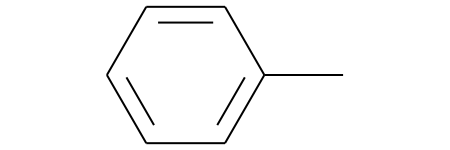

In [3]:
# Mol을 2D graph 형태로 notebook cell에서 출력
m

Minor tips
- atom index, bond index를 annotation

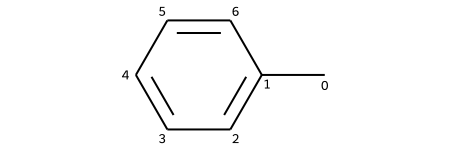

In [4]:
# Atom index와 Bond index를 annotation 하는 함수. 필요에 따라 복사해서 사용 가능.
def show_atom_idx(mol):
    '''
    Atom index를 atom 위에 출력해주는 함수. (inplace)
    '''
    for atom in mol.GetAtoms():
        atom.SetProp('atomNote', str(atom.GetIdx()))

def show_bond_idx(mol):
    '''
    Bond index를 bond 위에 출력해주는 함수. (inplace)
    Atom과 구분을 위해 b0, b1, ... 형태로 출력됨.
    '''
    for bond in mol.GetBonds():
        bond.SetProp('bondNote', 'b'+str(bond.GetIdx()))
        
show_atom_idx(m)
m

In [5]:
# Mol object Load 실패 케이스
m1 = Chem.MolFromSmiles('CO(C)C') # Explicit valence for atom # 1 O, 3, is greater than permitted
m2 = Chem.MolFromSmiles('c1cc1') # Can't kekulize mol
print(m1 == None)
print(m2 == None)

True
True


[17:09:57] Explicit valence for atom # 1 O, 3, is greater than permitted
[17:09:57] Can't kekulize mol.  Unkekulized atoms: 0 1 2


SDF file 로부터 여러 molecule을 load

[17:09:59] Explicit valence for atom # 13 Cl, 5, is greater than permitted
[17:09:59] ERROR: Could not sanitize molecule ending on line 129414
[17:09:59] ERROR: Explicit valence for atom # 13 Cl, 5, is greater than permitted
[17:09:59] Explicit valence for atom # 19 O, 3, is greater than permitted
[17:09:59] ERROR: Could not sanitize molecule ending on line 174651
[17:09:59] ERROR: Explicit valence for atom # 19 O, 3, is greater than permitted
[17:09:59] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:09:59] ERROR: Could not sanitize molecule ending on line 225596
[17:09:59] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
[17:09:59] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:09:59] ERROR: Could not sanitize molecule ending on line 247936
[17:09:59] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
[17:09:59] Explicit valence for atom # 12 N, 4, is greater than permitted
[17:09:59] ERROR: Could not sanitize

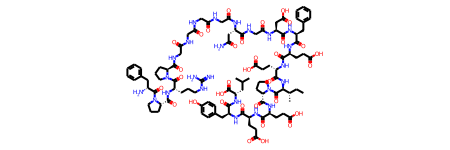

In [6]:
# Load molecules from Supplier (SDF file)
suppl = Chem.SDMolSupplier('sdf_example.sdf')
mols = []
for mol in suppl:
    if mol is None:
        continue
    mols.append(mol)
mols[0]

mol file로부터 mol object load

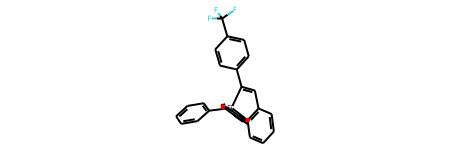

In [7]:
mol = Chem.MolFromMolFile('mol_example.mol')
mol

### Writing Molecules

In [8]:
m = Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
print(Chem.MolToSmiles(m))
print(Chem.MolToSmiles(m,isomericSmiles=False)) # chirality를 제거하는 option

C[C@H](O)c1ccccc1
CC(O)c1ccccc1


Chem.MolToSmiles의 output은 canonical SMILES 이므로, 같은 molecule이라면, mol object를 만들 때 SMILES가 달랐더라도 동일한 SMILES가 나옴.  
cf) http://openbabel.org/docs/current/FileFormats/Canonical_SMILES_format.html

In [9]:
print(Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1')))
print(Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1')))

c1ccncc1
c1ccncc1
c1ccncc1


Kekulization: 1중 결합과 2중 결합의 사이 정도의 성격을 지닌 aromatic bond들을 임의로 explicit하게 1중 결합, 2중 결합으로 분리하는 것  
cf) https://chemistry.stackexchange.com/questions/116498/what-is-kekulization-in-rdkit

In [10]:
Chem.Kekulize(m)
Chem.MolToSmiles(m, kekuleSmiles=True) # kekulize 한 뒤에는 canonical 하지 않다.

'C[C@H](O)C1=CC=CC=C1'

### 3D conformer generation -> 뒤에서 다시 자세히 다룸.

In [11]:
m3 = Chem.AddHs(m) # 3D conformer generation 시에는 꼭 수소를 추가하여 계산하는 것이 더 정확한 결과를 얻을 수 있음.
AllChem.EmbedMolecule(m3, randomSeed=42) # default method: ETKDG
print(Chem.MolToMolBlock(m3))


     RDKit          3D

 19 19  0  0  0  0  0  0  0  0999 V2000
   -2.3319    0.7908   -0.0153 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5562   -0.4948   -0.3209 C   0  0  2  0  0  0  0  0  0  0  0  0
   -1.9845   -1.4216    0.6483 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0899   -0.2431   -0.2031 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7767   -1.3024   -0.0395 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1477   -1.0931    0.0727 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6631    0.1845    0.0216 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8070    1.2725   -0.1433 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4575    1.0178   -0.2499 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8619    1.2367    0.8852 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3617    0.4810    0.3007 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3173    1.4477   -0.8842 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8325   -0.8888   -1.3064 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4831   -1.2002    1

In [12]:
# conformer 만든 이후에 H가 필요 없다면, remove 하고 사용
m3 = Chem.RemoveHs(m3)
print(Chem.MolToMolBlock(m3))


     RDKit          3D

  9  9  0  0  0  0  0  0  0  0999 V2000
   -2.3319    0.7908   -0.0153 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5562   -0.4948   -0.3209 C   0  0  2  0  0  0  0  0  0  0  0  0
   -1.9845   -1.4216    0.6483 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0899   -0.2431   -0.2031 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7767   -1.3024   -0.0395 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1477   -1.0931    0.0727 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6631    0.1845    0.0216 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8070    1.2725   -0.1433 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4575    1.0178   -0.2499 C   0  0  0  0  0  0  0  0  0  0  0  0
  2  1  1  1
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END



### Working with Molecules

RDKit mol object는 atom은 각 atom 별 object로, bond는 (begin atom, end atom)의 일종의 tuple 형태로 저장함.

Loop over atoms and bonds
- mol.GetAtoms(), mol.GetBonds()
- atom.GetNeighbors(), atom.GetSymbol(), atom.GetAtomicNum(), atom.GetBeginAtomIdx(), atom.GetEndAtomIdx(), atom.IsInRing(), atom.IsInRingSize()
- bond.GetBondType()

In [13]:
m = Chem.MolFromSmiles('C1OC1')
for atom in m.GetAtoms(): # atom들을 iterate
    print(atom.GetAtomicNum()) # 원자번호를 출력

6
8
6


In [14]:
print(m.GetBonds()[0].GetBondType()) # bond type 출력

SINGLE


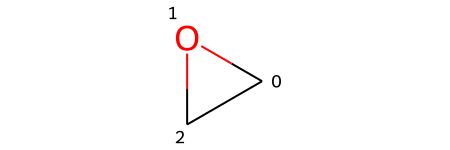

In [15]:
show_atom_idx(m)
m

In [16]:
# 각 atom과 bond에 대한 정보를 알 수 있다.
print(m.GetAtomWithIdx(0).GetSymbol()) # atom symbol
print(m.GetAtomWithIdx(0).GetAtomicNum()) # atom의 atom number
print(m.GetAtomWithIdx(0).GetExplicitValence()) # atom의 valence
print(m.GetBondWithIdx(0).GetBeginAtomIdx()) # bond의 begin atom의 index
print(m.GetBondWithIdx(0).GetEndAtomIdx()) # bond의 end atom의 index
print(m.GetBondBetweenAtoms(0, 1).GetBondType()) # 두 atom 간 bond의 bond type

C
6
2
0
1
SINGLE


In [17]:
# Atom은 neighbor들을 기억하고 있다.
atom = m.GetAtomWithIdx(0) # 0번째 atom
print([x.GetAtomicNum() for x in atom.GetNeighbors()]) # atom의 neighbor들의 atom number
print([x.GetSymbol() for x in atom.GetNeighbors()]) # atom neighbor들의 symbol
print(len(atom.GetNeighbors()[-1].GetBonds())) # atom의 neighbor 중 하나의 bond 갯수

[8, 6]
['O', 'C']
2


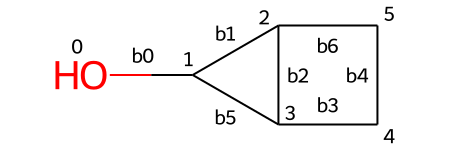

In [18]:
# ring 구조
m = Chem.MolFromSmiles('OC1C2C1CC2')
show_atom_idx(m)
show_bond_idx(m)
m

In [19]:
# atom, bond의 정보 보기
print(m.GetAtomWithIdx(0).IsInRing()) # False
print(m.GetAtomWithIdx(1).IsInRing()) # True
print(m.GetAtomWithIdx(2).IsInRingSize(3)) # True
print(m.GetAtomWithIdx(2).IsInRingSize(4)) # True
print(m.GetAtomWithIdx(2).IsInRingSize(5)) # False

print(m.GetBondWithIdx(1).IsInRingSize(3)) # True
print(m.GetBondWithIdx(2).IsInRing()) # True

False
True
True
True
False
True
True


In [20]:
# cf) SSSR (smallest set of smallest rings)
# Symmetrized & non-symmetrized SSSR 간의 구분은 RDKit docs 참고.
ssr = Chem.GetSymmSSSR(m) # symmetrized SSSR
print(len(ssr))
print(list(ssr[0]))
print(list(ssr[1]))

2
[1, 2, 3]
[4, 5, 2, 3]


Modifying molecules
- Chem.AddHs(), Chem.Kekulize(), Chem.SanitizeMol()
- 기본적으로 molecule은 hydrogen atom은 atom의 valence와 neighbor들을 고려해 implicit하게만 포함되어 있다.
- 즉, H가 explicit하게 포함되지 않은 상황에서는 H는 atom 갯수나 neighbor에 직접 포함되지 않는다.
- H를 추가하는 것이 필요할 때는 Chem.AddHs() 함수를 사용한다.

3


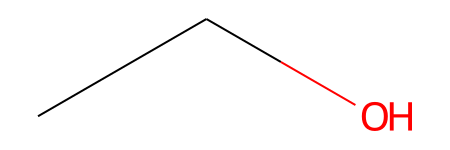

In [21]:
m = Chem.MolFromSmiles('CCO')
print(m.GetNumAtoms())
m

9


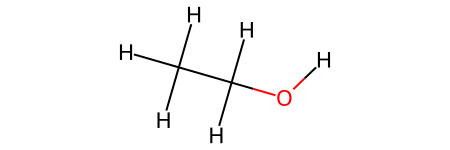

In [22]:
# 3D geometry를 생성하거나 optimize 하는 등 hydrogen이 explicit하게 필요할 경우는 AddHs function을 사용한다.
m2 = Chem.AddHs(m)
print(m2.GetNumAtoms())
m2

AROMATIC
AROMATIC


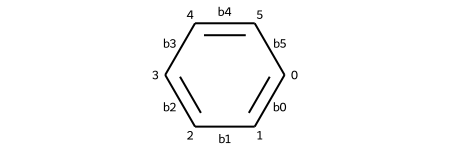

In [23]:
# RDKit molecule은 aromatic bond type에 해당하는 경우, bond type이 AROMATIC으로 설정된다.
m = Chem.MolFromSmiles('c1ccccc1')
show_atom_idx(m)
show_bond_idx(m)
print(m.GetBondWithIdx(0).GetBondType())
print(m.GetBondWithIdx(1).GetBondType())
m

In [24]:
# 이를 SINGLE, DOUBLE로 구분하려면 Chem.Kekulize() function을 사용한다. (자주 사용하지는 않을 것이다.)
Chem.Kekulize(m)
print(m.GetBondWithIdx(0).GetBondType())
print(m.GetBondWithIdx(1).GetBondType())
# 이렇게 하더라도, default로 IsAromatic attribute은 True 이다.
print(m.GetBondWithIdx(1).GetIsAromatic())
# IsAromatic까지 False로 하고 싶으면, Kekulize에 argument를 입력해준다.
Chem.Kekulize(m, clearAromaticFlags=True)
print(m.GetBondWithIdx(0).GetIsAromatic())
# 다시 restore 하기 위해서는 Chem.SanitizeMol() function을 사용한다.
Chem.SanitizeMol(m)
print(m.GetBondWithIdx(0).GetBondType())
print(m.GetBondWithIdx(0).GetIsAromatic())

DOUBLE
SINGLE
True
False
AROMATIC
True


Working with 2D molecules: Generating depictions
- AllChem.Compute2DCoords(): 2D graph를 그려주는 library. 가장 가시성이 좋은 형태로 그린다.

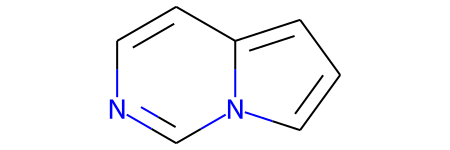

In [25]:
m = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(m) # 가장 가시성이 좋은 형태로 그려준다.
m

In [26]:
# 만약 어떤 template을 공유하는 분자들을 align하여 그리고 싶다면, 아래 코드 사용
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)
ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]
for m in ms:
    _ = AllChem.GenerateDepictionMatching2DStructure(m,template)

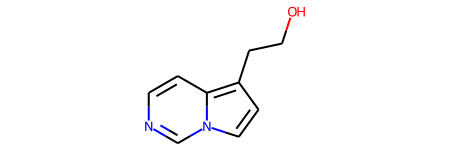

In [27]:
ms[0]

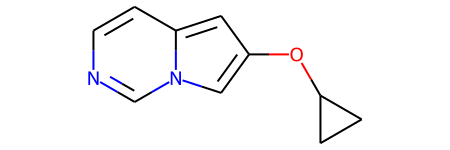

In [28]:
ms[1]

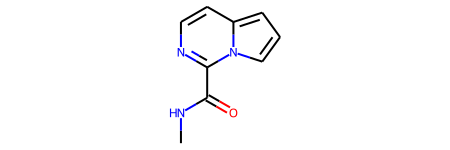

In [29]:
ms[2]

Working with 3D molecules

> RDkit은 두 가지 방법으로 conformer를 만들 수 있다.
> > - Distance geometry method  
    1. Connection table과 몇 가지 규칙으로 molecule의 distance bounds matrix 계산  
    2. Bounds matrix가 triangle-bounds smoothing algorithm으로 smoothing 됨.  
    3. Bounds matrix를 만족하는 random distance matrix 만들어짐.  
    4. Distance matrix가 3D dimension에 embedding 됨.  
    5. 각 coordinate가 force field와 bounds matrix에 의해 clean-up 됨.  
    \* Distance geometry method로 구해진 conformer는 꽤 ugly 하므로 기왕이면 꼭 force field로 clean up 되어야 한다.  
    \* RDKit의 force field clean up은 UFF, MMFF94 등을 지원한다.  
        - UFF: Universal Force Field (1992), AllChem.UFFOptimizeMolecule()
        - MMFF: Merck Molecular Force Field (1996), AllChem.MMFFOptimizeMolecule()
> > - ETKDG method (by Riniker and Landrum, 2015)  
    - AllChem.EmbedMolecule()의 default method  
    Torsional angle preference를 사용해 distance geometry를 수정함.
    이 방법을 사용하면 force field clean up이 필요 없을 정도로 괜찮은 수준의 conformer를 얻을 수 있음. 물론 conformer를 얻은 뒤 clean up을 수행할 수 없는 것은 아니고, 꼭 할 필요는 없는 정도.

\* 참고로 MMFF는 자체적인 aromaticity model을 사용하므로, MMFF 관련 methods를 사용한 뒤에는 molecule의 aromaticity flag가 달라져 있을 것이다.

\* RDKit에서 3D conformer를 만들 때는 Chem.AddHs() 로 수소를 추가한 뒤에 하는 것이 성능에 도움이 된다. Conformer generation 이후에 수소가 필요가 없다면 Chem.RemoveHs() 로 다시 없앨 수 있다.

\* AllChem.EmbedMolecule(), AllChem.UFFOptimizeMolecule(), AllChem.MMFFOptimizeMolecule() 등은 return으로 0, 1, -1 을 내놓는다.
- 0: converged (success)
- 1: need more iteration (not converged)
- -1: failure


더 자세한 내용은 RDKit Book과 RDKit Blog를 참고.
- https://greglandrum.github.io/rdkit-blog/conformers/exploration/2021/01/31/looking-at-random-coordinate-embedding.html

In [49]:
m2 = Chem.AddHs(m)
# Initial embedding 생성
status = AllChem.EmbedMolecule(m2) # ETKDG. Argument로 maxAttempts, randomSeed 등이 있다.
# Optimize (clean up)
status = AllChem.MMFFOptimizeMolecule(m2) # MMFF94. Argument로 maxIters 등이 있다.
status = AllChem.UFFOptimizeMolecule(m2) # UFF. Argument로 maxIters 등이 있다.

In [50]:
status

0

RDkit에서는 EmbedMultipleConfs function의 _numConfs_ option을 통해 multiple conformer 를 만들 수 있는데, 이는 여러 random start point에서 시작하는 것이다.

In [70]:
mol = Chem.MolFromSmiles('C1CCC1OC')
AllChem.Compute2DCoords(mol)
conf = mol.GetConformer()

In [30]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2 = Chem.AddHs(m)
# run ETKDG 10 times
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10)
print(len(cids))

# 첫 번째 conformer와 다른 conformer 간의 RMS value 차이를 기록하는 list
rmslist = []
AllChem.AlignMolConformers(m2, RMSlist=rmslist) # molecule끼리 align
print(len(rmslist))

# 특정 두 conformer 끼리의 RMS value를 계산할 수도 있음.
rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned=True) # 기본적으로 align 되어 있음
print(rms)

# 여러 개의 conformation에 대해 MMFF optimization을 수행하고 싶을 때는 MMFFOptimizeMoleculeConfs function을 사용.
res = AllChem.MMFFOptimizeMoleculeConfs(m2)
print(res) # list of tuples of (not_converged, engergy). 0이면 converge 된 것.

10
9
1.1827110802104737
[(0, 11.677582321120976), (0, 10.728830581838565), (0, 10.7288305787741), (0, 10.728830580064784), (0, 10.728830583023319), (0, 10.72883058213529), (0, 11.677582320637976), (0, 10.728830577569822), (0, 10.728830577522134), (0, 10.728830577947033)]


In [ ]:
# Conformation 계산 및 atom position 구하는 함수 (https://doi.org/10.1038/s42256-021-00438-4의 함수를 개선)
def get_atom_poses(mol, conf):
    atom_poses = []
    for i, atom in enumerate(mol.GetAtoms()):
        if atom.GetAtomicNum() == 0:
            return [[0.0, 0.0, 0.0]] * len(mol.GetAtoms())
        pos = conf.GetAtomPosition(i)
        atom_poses.append([pos.x, pos.y, pos.z])
    return atom_poses

def get_MMFF_atom_poses(mol, numConfs=None, return_energy=False, numThreads=None):
    '''The atoms of mol will be changed in some cases.'''
    try:
        ps = AllChem.ETKDGv3()
        ps.numThreads = 4
        # ps.useRandomCoords = True # default는 False. True로 하는 것이 속도는 조금 느린데 더 robust하다는 주장이 있음.
        new_mol = Chem.AddHs(mol)
        res = AllChem.EmbedMultipleConfs(new_mol, numConfs=numConfs) # ETKDG
        res = AllChem.MMFFOptimizeMoleculeConfs(new_mol) # MMFF
        # res = AllChem.UFFOptimizeMoleculeConfs(new_mol) # UFF
        new_mol = Chem.RemoveHs(new_mol)
        index = np.argmin([x[1] for x in res]) # energy가 가장 낮은 conformer의 index
        energy = res[index][1] # 가장 낮은 energy
        conf = new_mol.GetConformer(id=int(index)) # 가장 낮은 energy의 conformer
    except:
        new_mol = mol
        AllChem.Compute2DCoords(new_mol)
        energy = 0
        conf = new_mol.GetConformer()

    atom_poses = get_atom_poses(new_mol, conf)
    if return_energy:
        return new_mol, atom_poses, energy
    else:
        return new_mol, atom_poses

cf) Multi-threading
_AllChem.EmbedMultipleConfs_ 와 _AllChem.MMFFOptimizeMoleculeConfs_ 는 default로 single thread.
Multi thread로 사용하려면 _numThreads_ argument를 사용. _numThreads=0_ 이면 maximum thread 사용.

Preserving Molecules

RDKit mol object는 Python의 pickle로 저장하고, 불러올 수 있다.
RDKit pickle format은 굉장히 압축되어 있고 효율적이어서, Mol file(SDF)이나 SMILES string 으로부터 불러오는 것보다 pickled object를 불러오는 것이 훨씬 빠르다.

In [30]:
m = Chem.MolFromSmiles('c1ccncc1')
import pickle
pkl = pickle.dumps(m)
m2 = pickle.loads(pkl)
Chem.MolToSmiles(m2)

'c1ccncc1'

### Drawing Molecules - To do

RDKit의 rdkit.Chem.Draw package를 사용하여 molecule의 이미지를 만들 수 있다.

### Substructure Searching

Molecule의 substructure matching은 query할 pattern을 SMARTS 형태로 사용하는 것이 일반적이다.
Query pattern을 SMILES 로도 검색할 수 있으나, SMARTS와 SMILES는 같은 string 이더라도 다른 것을 의미하는 경우가 많으므로 주의할 필요가 있다.

_HasSubstructMatch_ 는 Boolean을 return 한다.
_GetSubstructMatch_ 는 겹치는 atom의 index를 return 하고, 대상 molecule에 있는 해당 pattern 부분을 색칠해준다.

In [31]:
m = Chem.MolFromSmiles('c1ccccc1O')
patt = Chem.MolFromSmarts('ccO') # SMARTS로 matching

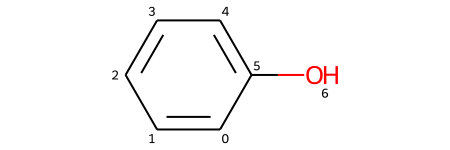

In [32]:
show_atom_idx(m)
m

True
(0, 5, 6)


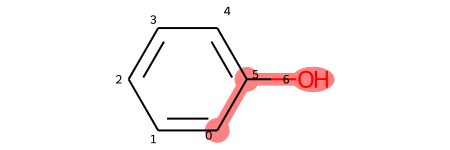

In [33]:
print(m.HasSubstructMatch(patt))
print(m.GetSubstructMatch(patt))
m

((0, 5, 6), (4, 5, 6))


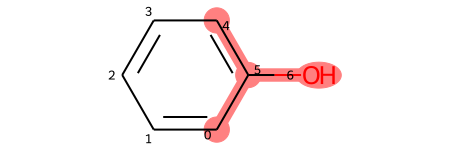

In [34]:
print(m.GetSubstructMatches(patt)) # 2개 이상의 pattern일 경우
m

SMILES와 SMARTS는 다르다!

((5, 6, 7),)


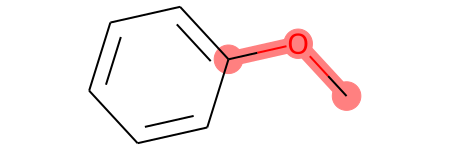

In [35]:
# SMILES로 matching
m = Chem.MolFromSmiles('C1=CC=CC=C1OC')
print(m.GetSubstructMatches(Chem.MolFromSmiles('COC')))
m

((7, 6, 5),)


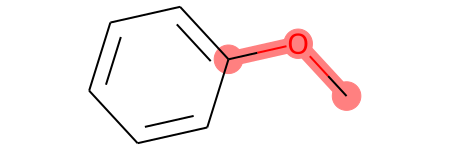

In [36]:
m = Chem.MolFromSmiles('C1=CC=CC=C1OC')
print(m.GetSubstructMatches(Chem.MolFromSmarts('COc')))
m

Stereochemistry in substructure matches

Default: substructure search에서 stereochemistry 정보는 사용되지 않는다.
_useChirality_ argument를 사용하면 된다.

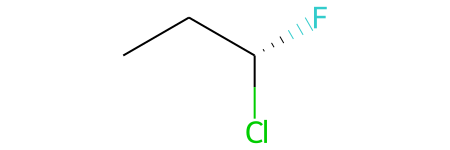

In [37]:
m = Chem.MolFromSmiles('CC[C@H](F)Cl')
m

In [38]:
# default: Stereo chemistry 사용 X
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl')))
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl')))
print(m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl')))

True
True
True


In [39]:
# useChirality
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'), useChirality=True))
print(m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'), useChirality=True))
# chiral molecule <- non-chiral query: match 된다.
print(m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'), useChirality=True)) # non-chiral query는 match 된다!
# non-chiral molecule <- chiral query: match 안 된다.
m2 = Chem.MolFromSmiles('CCC(F)Cl')
print(m2.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True))

True
False
True
False


Atom Map indices in SMARTS

SMARTS pattern의 atom에 index를 붙일 수 있는데, 보통 chemical reaction을 SMARTS로 표현할 때 많이 사용한다.
SMARTS 안에 있는 atom들에 index가 parse 되면, _GetSubstructMatches_ 로 substructure를 match 할 때 index mapping을 할 수 있다.

In [10]:
qmol = Chem.MolFromSmarts('[cH0:1][c:2]([cH0])!@[CX3!r:3]=[NX2!r:4]')
ind_map = {}
for atom in qmol.GetAtoms():
    map_num = atom.GetAtomMapNum()
    if map_num:
        ind_map[map_num-1] = atom.GetIdx()
map_list = [ind_map[x] for x in sorted(ind_map)]
print(map_list)

[0, 1, 3, 4]


In [20]:
mol = Chem.MolFromSmiles('Cc1cccc(C)c1C(C)=NC')
for match in mol.GetSubstructMatches(qmol):
    mas = [match[x] for x in map_list]
    print(mas) # molecule object에서 query와 match된 atom의 index를 출력

[1, 7, 8, 10]


C
C
C
N


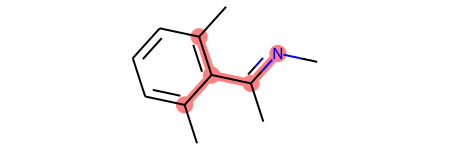

In [22]:
print(mol.GetAtomWithIdx(1).GetSymbol())
print(mol.GetAtomWithIdx(7).GetSymbol())
print(mol.GetAtomWithIdx(8).GetSymbol())
print(mol.GetAtomWithIdx(10).GetSymbol())
mol

Advanced substructure matching - To do

RDKit은 특정 substructure match를 더 specific하게 할 수 있는 기능을 제공한다.

----------------------------------------------------------------

### Chemical Transformations

RDKit에서는 간단하게 molecule의 일부분을 바꿀 수 있는 기능을 제공한다.
더 복잡한 transformation은 Chemical Reactions 부분을 참고하는 것이 좋다.

Substructure-based transformation

In [26]:
# Substructure 삭제 (delete)
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('C(=O)[OH]')
rm = AllChem.DeleteSubstructs(m, patt)
Chem.MolToSmiles(rm)

'C'

In [28]:
# Substructure 교체 (replace)
repl = Chem.MolFromSmiles('OC')
patt = Chem.MolFromSmarts('[$(NC(=O))]')
m = Chem.MolFromSmiles('CC(=O)N')
rms = AllChem.ReplaceSubstructs(m, patt, repl) # mol object m에서 patt를 repl로 교체
Chem.MolToSmiles(rms[0])

'COC(C)=O'

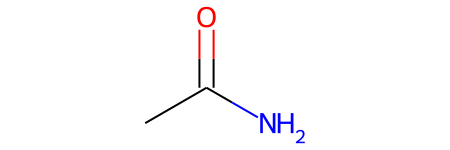

In [30]:
m

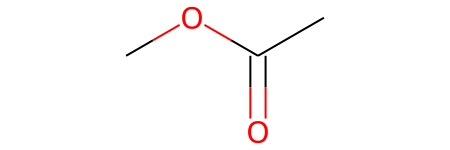

In [31]:
Chem.MolFromSmiles('COC(C)=O')